In [4]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# File to Load 
CleanMovieData = "output/CleanMovieData.csv"

CleanedDF = pd.read_csv(CleanMovieData)
CleanedDF.count()

budget               4800
genres               4800
id                   4800
original_language    4800
popularity           4800
release_date         4800
revenue              4800
runtime              4800
title                4800
vote_average         4800
vote_count           4800
Action               4800
Adventure            4800
Animation            4800
Comedy               4800
Crime                4800
Documentary          4800
Drama                4800
Family               4800
Fantasy              4800
Foreign              4800
History              4800
Horror               4800
Music                4800
Mystery              4800
Romance              4800
Science Fiction      4800
Thriller             4800
TV Movie             4800
War                  4800
Western              4800
Year                 4800
Decade               4800
dtype: int64

In [10]:
#define genre list
genres = ['Action','Adventure','Animation','Comedy','Crime','Documentary','Drama','Family','Fantasy','Foreign',
          'History','Horror','Music','Mystery','Romance','Science Fiction','Thriller','TV Movie','War','Western']
#create a new column for each genre containing a boolean 
for genre in genres:
    CleanedDF[genre] = CleanedDF['genres'].str.contains(genre)
#show df   
CleanedDF.head()

,budget,genres,id,original_language,popularity,release_date,revenue,runtime,title,vote_average,...,Music,Mystery,Romance,Science Fiction,Thriller,TV Movie,War,Western,Year,Decade
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,en,150.437577,2009-12-10,2787965087,162.0,Avatar,7.2,...,False,False,False,True,False,False,False,False,2009,2000's
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,en,139.082615,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,...,False,False,False,False,False,False,False,False,2007,2000's
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,en,107.376788,2015-10-26,880674609,148.0,Spectre,6.3,...,False,False,False,False,False,False,False,False,2015,2010's
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,en,112.312950,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,...,False,False,False,False,True,False,False,False,2012,2010's
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,en,43.926995,2012-03-07,284139100,132.0,John Carter,6.1,...,False,False,False,True,False,False,False,False,2012,2010's


In [11]:
#isolate release year, convert to int, and cut into decades
CleanedDF['Year'] = CleanedDF['release_date'].str.split('-').str[0]
CleanedDF['Year'] = pd.to_numeric(CleanedDF['Year'], errors='coerce')
decade_bins = [0,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020]
decade_labels = ["1910's","1920's","1930's","1940's","1950's","1960's","1970's","1980's","1990's","2000's","2010's"]
CleanedDF['Decade'] = pd.cut(CleanedDF['Year'], decade_bins, labels=decade_labels)

#show df
CleanedDF.head()

,budget,genres,id,original_language,popularity,release_date,revenue,runtime,title,vote_average,...,Music,Mystery,Romance,Science Fiction,Thriller,TV Movie,War,Western,Year,Decade
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,en,150.437577,2009-12-10,2787965087,162.0,Avatar,7.2,...,False,False,False,True,False,False,False,False,2009,2000's
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,en,139.082615,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,...,False,False,False,False,False,False,False,False,2007,2000's
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,en,107.376788,2015-10-26,880674609,148.0,Spectre,6.3,...,False,False,False,False,False,False,False,False,2015,2010's
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,en,112.312950,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,...,False,False,False,False,True,False,False,False,2012,2010's
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,en,43.926995,2012-03-07,284139100,132.0,John Carter,6.1,...,False,False,False,True,False,False,False,False,2012,2010's


In [12]:
# Get GenreCounts
# A is empty list to get value counts of Genres
A = []
for genre in genres:
    A.append(CleanedDF[genre].value_counts().unique().tolist())
A 

# Dividing A into flat_list to get the False and True values separated into list
flat_list = []
for sublist in A:
    for item in sublist:
        flat_list.append(item)
flat_list
length = len(flat_list)
flat_list

# Creating Flat_list2 to get only the True values which are odd indexes
flat_list2 = []
flatlistindex = 0
for item in flat_list:
    if(flatlistindex)%2!=0:
        flat_list2.append(item)
    flatlistindex += 1

#flat_list2
# Count total of genres
TotalGenreCount = sum(flat_list2)
TotalGenreCount

GenrePercentage = []
for genrecount in flat_list2:
    GenrePercentage.append(round(genrecount*100/TotalGenreCount,2))
    
# Creating GenreCountsDF from the data
GenreCountsDF = pd.DataFrame(
{
    'Genre':genres,
    "Counts":flat_list2,
    "Percentage":GenrePercentage
}
)

# Display sorted list of Genres
GenreCountsDF.sort_values(by = ['Counts'], ascending = False)


,Genre,Counts,Percentage
6,Drama,2296,18.88
3,Comedy,1722,14.16
16,Thriller,1274,10.48
0,Action,1154,9.49
14,Romance,894,7.35
1,Adventure,790,6.50
4,Crime,696,5.72
15,Science Fiction,535,4.40
11,Horror,519,4.27
7,Family,513,4.22


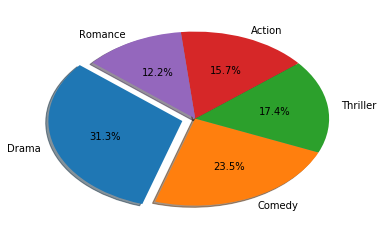

In [13]:
# Plot Genre counts as percentage of movies in sample of 5000 movies
SortedGenreCountsDF = GenreCountsDF.sort_values(by=['Counts'],ascending=False)
#plt.pie(flat_list2,labels= genres, autopct = "%1.1f%%", shadow = True, startangle = 140)
Top5GenreCountsDF = SortedGenreCountsDF.reset_index()
Top5GenresDF = Top5GenreCountsDF.loc[0:4,]
Top5Genres = Top5GenresDF['Genre']
Top5GenreCounts = Top5GenresDF['Counts']

Top5GenresDF
# Drama, Comedy, Thriller, Action, Romance
explode = (0.1,0,0,0,0)

# Plot the top 5 Genres as a Pie Chart
plt.pie(Top5GenreCounts,labels= Top5Genres, autopct = "%1.1f%%", explode = explode, shadow = True, startangle = 140)
plt.savefig("Output/Top5GenrePie.png")

In [14]:
# Condition to remove 0 budget and 0 revenue rows
Clean2DF = CleanedDF[(CleanedDF.budget != 0) & (CleanedDF.revenue != 0)]
# Total 3229 rows
Clean2DF

# Group by Decade
DecadeGroup = Clean2DF[['Decade','id','budget','popularity','revenue']].groupby('Decade')

# Count movies in each decade
MoviesPerDecade = DecadeGroup['id'].count()
MoviesPerDecade = MoviesPerDecade.reset_index()
MoviesPerDecade = MoviesPerDecade.rename(columns={"Decade":"Decade","id":"Movie Count"})
MoviesPerDecade

,Decade,Movie Count
0,1910's,1
1,1920's,4
2,1930's,17
3,1940's,17
4,1950's,27
5,1960's,65
6,1970's,88
7,1980's,211
8,1990's,624
9,2000's,1390


In [15]:

# Get Revenue / Budget ratio
RevenueBudgetRatio = DecadeGroup[['budget','revenue']].sum()
RevenueBudgetRatio['profitratio'] = round(RevenueBudgetRatio['revenue'] / RevenueBudgetRatio['budget'],2)
RevenueBudgetRatio = RevenueBudgetRatio.reset_index()
RevenueBudgetRatio

,Decade,budget,revenue,profitratio
0,1910's,385907,8394751,21.75
1,1920's,97194000,35008422,0.36
2,1930's,24351164,846101038,34.75
3,1940's,39232785,417958774,10.65
4,1950's,74981596,443342165,5.91
5,1960's,446566033,2409245720,5.40
6,1970's,916422794,7471821190,8.15
7,1980's,3724477523,19160580166,5.14
8,1990's,23977877510,68012714056,2.84
9,2000's,61350415636,164331219774,2.68


In [16]:

# Popularity in each decade
PopularityPerDecade = round(DecadeGroup['popularity'].mean(),2)
PopularityPerDecade = PopularityPerDecade.reset_index()
PopularityPerDecade

,Decade,popularity
0,1910's,3.23
1,1920's,10.65
2,1930's,21.33
3,1940's,11.95
4,1950's,17.07
5,1960's,18.71
6,1970's,28.35
7,1980's,23.07
8,1990's,22.51
9,2000's,25.26


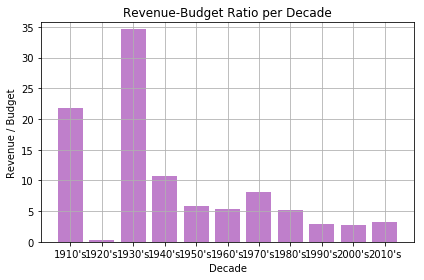

In [17]:
# Bar Plot
# Obtain the x and y coordinates 
# X Axis is Decade
from matplotlib.pyplot import text

Decades = MoviesPerDecade['Decade']
xAxis = Decades
yAxis = RevenueBudgetRatio['profitratio']

# Create a bar chart based upon the above data
ax = plt.bar(xAxis, yAxis, color=(0.5, 0, 0.6, 0.5), align="center")

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in xAxis]
plt.xticks(tick_locations, xAxis)

# Incorporate the other graph properties
plt.xlabel('Decade')
plt.ylabel('Revenue / Budget')
plt.title('Revenue-Budget Ratio per Decade')

plt.ylim(0,max(yAxis)+1)

# Save Figure
plt.grid()
plt.tight_layout()

plt.savefig("output/RevenueBudgetRatioBarPlot.png")
plt.show()

In [18]:
# Locate movies with original_language!= 'en'
#CleanedDF.head()
#ForeignLangDF = CleanedDF.loc[(CleanedDF['Foreign']==True)]
#ForeignLangDF

#Clean2DF

# Plot Revenue vs Runtime for Decades
Clean2DF['runtime'].max()

runtime_bins = [30,60,90,120,150,180,360]
runtime_labels = ["30-60","60-90","90-120","120-150","150-180","180-360"]
Clean2DF['Runtime Range'] = pd.cut(Clean2DF['runtime'], runtime_bins, labels=runtime_labels)

# Group by runtime and choose relevant columns
RuntimeGroup = Clean2DF[["budget","popularity","revenue","Decade","Runtime Range"]].groupby('Runtime Range')

# Get a count of movies in runtime bins
RuntimeMovieCount = RuntimeGroup['budget'].count()
RuntimeMovieCount = RuntimeMovieCount.reset_index()

# Get a mean of revenue
RuntimeRangeDF = RuntimeGroup[['revenue','budget']].mean()
RuntimeRangeDF = RuntimeRangeDF.reset_index()
# Get Profit ratio and count variables in DF
RuntimeRangeDF['profitratio']= round(RuntimeRangeDF['revenue'] / RuntimeRangeDF['budget'],2)
RuntimeRangeDF['count']=RuntimeMovieCount['budget']

# Display DF of runtime bins
RuntimeRangeDF

C:\Users\kruiz\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


,Runtime Range,revenue,budget,profitratio,count
0,30-60,5.796450e+06,5.500000e+06,1.05,2
1,60-90,8.332761e+07,2.882380e+07,2.89,393
2,90-120,9.775888e+07,3.579256e+07,2.73,2006
3,120-150,1.823934e+08,5.637957e+07,3.24,684
4,150-180,2.879184e+08,7.498582e+07,3.84,109
5,180-360,1.854193e+08,3.992860e+07,4.64,35


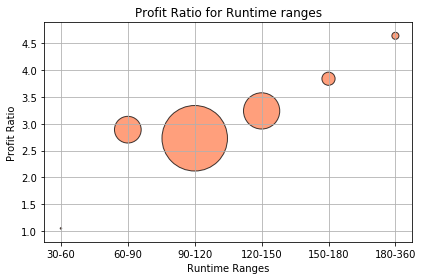

In [19]:
# Plot the runtime bins with a scatter plot of profitratio, and display count as bubbles.

# Obtain the x and y coordinates for each of the three city types
RuntimeProfitRatio = RuntimeRangeDF['profitratio']
RuntimeBinCount = RuntimeRangeDF['count']
# Y axis will plot Average Fare ($), this is also last column in DF
#xAxis = runtime_bins
#xAxis2 = RidesSuburbanDF['Total Rides Per City']
#xAxis3 = RidesRuralDF['Total Rides Per City']

# Build the scatter plots for each city types
plt.scatter(runtime_labels, RuntimeProfitRatio, marker="o", facecolors="coral", s=RuntimeBinCount**1.1, edgecolors="black", alpha=0.75, label = '')

# Incorporate the other graph properties
plt.xlabel('Runtime Ranges')
plt.ylabel('Profit Ratio')
plt.title('Profit Ratio for Runtime ranges')
plt.ylim(min(RuntimeProfitRatio)-0.25,max(RuntimeProfitRatio)+0.25)

# Create a legend
#plt.legend(title = 'City Types')
#plt.text(56,30,'Note: Circle size correlates with driver size per city',horizontalalignment='center',verticalalignment='center')
# Incorporate a text label regarding circle size

# Save Figure
plt.grid()
plt.tight_layout()
plt.savefig("output/ProfitRatio_Runtime.png")
plt.show()
